# Multi-Modality Fusion Model


### INDEX:

**1)  [Mount G-Drive](#scrollTo=Jm42Bj4po3Y-)**<br/>
**2)  [VGG-16](#scrollTo=kOje8AUqxGz9)**<br/>
**3)  [ResNet-50](#scrollTo=yoaXkLst0vxa)**<br/>
**4)  [EffecientNet-V3](#scrollTo=9CGehUvs0u_p)**<br/>
**5)  [Fusion](#scrollTo=Qfl5gZAn23fO)**<br/>


------

### Header files

In [25]:
# our utils file
import utils
from models import VGG, ResNet, EffNetB3

# basic ML
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# connect to drive
from google.colab import drive

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

### Mounting G-Drive

In [2]:
drive.mount('/content/gdrive')
pkldest = '/content/gdrive/MyDrive/pkl_files/'
dataset = '/content/gdrive/MyDrive/Minidata'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


------
## VGG 16

<img src="https://user-images.githubusercontent.com/66634743/113575262-a8d31580-962e-11eb-840a-83f18c2029e3.png" height=150 width=600>


### Loading data from pkl

In [4]:
images = utils.load_from_pkl(pkldest+"vgg16_images.pkl")
scenes = utils.load_from_pkl(pkldest+"scenes.pkl")

print("Shape of Images = ", images.shape)
print("Shape of Scenes = ", scenes.shape)

Shape of Images =  (5059, 224, 224, 3)
Shape of Scenes =  (5059,)


### Building the model

In [5]:
vgg = VGG()
vgg.freeze()

vgg_features = vgg.predict(images=images)

159/159 [==============================] - 33s 128ms/step


### Dumping data into .pkl files

In [6]:
if("vgg16_features.pkl" not in os.listdir(pkldest)):
    utils.dump_into_pkl(vgg_features, pkldest+"vgg16_features.pkl")

### PCA (k = 512)

In [39]:
scenes = utils.prep_labels(scenes)
k = 512

pca = PCA(n_components=k)

pca.fit(vgg_features)

# dump PCA model
pickle.dump(pca, open(pkldest+'vgg_pca_model.pkl', 'wb'))

PCA_features = pca.transform(vgg_features)

print("Shape after PCA ", PCA_features.shape)

Shape after PCA  (5059, 512)


### Classifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(PCA_features, scenes, test_size=0.2, random_state=42)

classifier = svm.SVC(kernel='rbf', probability=True)

classifier.fit(X_train, y_train)

# save model for later
pickle.dump(classifier, open(pkldest+'vgg_svm_model.pkl', 'wb'))

SVC(probability=True)

### Temporary Results

In [41]:
pred = classifier.predict(X_test)

acc = np.sum(1*(pred==y_test))/y_test.shape[0]
print("VGG + SVM  = ", acc*100)

VGG + SVM  =  84.48616600790514


### Prababilities of classes

In [42]:
vgg16_probs = classifier.predict_proba(X_test)

print(vgg16_probs.shape)

(1012, 10)


### Confusion Matrix

[]

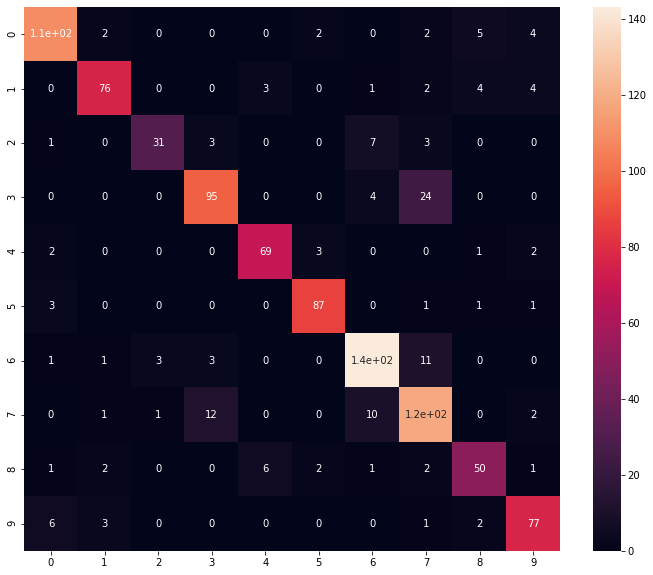

In [43]:
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.plot()

### Various Result

In [44]:
matrix = classification_report(y_test, pred) # labels=[1,0]
print('VGG16 Report : \n', matrix)

VGG16 Report : 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       124
           1       0.89      0.84      0.87        90
           2       0.89      0.69      0.78        45
           3       0.84      0.77      0.81       123
           4       0.88      0.90      0.89        77
           5       0.93      0.94      0.93        93
           6       0.86      0.88      0.87       162
           7       0.72      0.82      0.77       144
           8       0.79      0.77      0.78        65
           9       0.85      0.87      0.86        89

    accuracy                           0.84      1012
   macro avg       0.85      0.84      0.84      1012
weighted avg       0.85      0.84      0.84      1012



------
## ResNet50

<img src="https://user-images.githubusercontent.com/66634743/113575413-dfa92b80-962e-11eb-902c-380e39b91234.png" height=150 width=600>

### Loading data from pkl



In [3]:
images = utils.load_from_pkl(pkldest+"resnet_images.pkl")
scenes = utils.load_from_pkl(pkldest+"scenes.pkl")

print("Shape of Images = ", images.shape)
print("Shape of Scenes = ", scenes.shape)

Shape of Images =  (5059, 512, 512, 3)
Shape of Scenes =  (5059,)


### Building the model

In [4]:
resnet = ResNet()
resnet.freeze()

resnet_features = resnet.predict(images=images)

159/159 [==============================] - 91s 513ms/step


### Dumping data into .pkl files

In [5]:
if("resnet_features.pkl" not in os.listdir(pkldest)):
    utils.dump_into_pkl(resnet_features, pkldest+"resnet_features.pkl")

### PCA (k = 128)

In [20]:
scenes = utils.prep_labels(scenes)
k = 128

pca = PCA(n_components=k)

pca.fit(resnet_features)

# dump PCA model
pickle.dump(pca, open(pkldest+'resnet_pca_model.pkl', 'wb'))

PCA_features = pca.transform(resnet_features)

print("Shape after PCA ", PCA_features.shape)

Shape after PCA  (5059, 128)


### Classifier

In [21]:
X_train, X_test, y_train, y_test = train_test_split(PCA_features, scenes, test_size=0.2, random_state=42)

classifier = svm.SVC(kernel='rbf', probability=True)

classifier.fit(X_train, y_train)

# save model for later
pickle.dump(classifier, open(pkldest+'resnet_svm_model.pkl', 'wb'))

SVC(probability=True)

### Temporary Results

In [22]:
pred = classifier.predict(X_test)

acc = np.sum(1*(pred==y_test))/y_test.shape[0]
print("ResNet50 + SVM  = ", acc*100)

ResNet50 + SVM  =  90.21739130434783


### Prababilities of classes

In [23]:
resnet_probs = classifier.predict_proba(X_test)

print(resnet_probs.shape)

(1012, 10)


### Confusion Matrix

[]

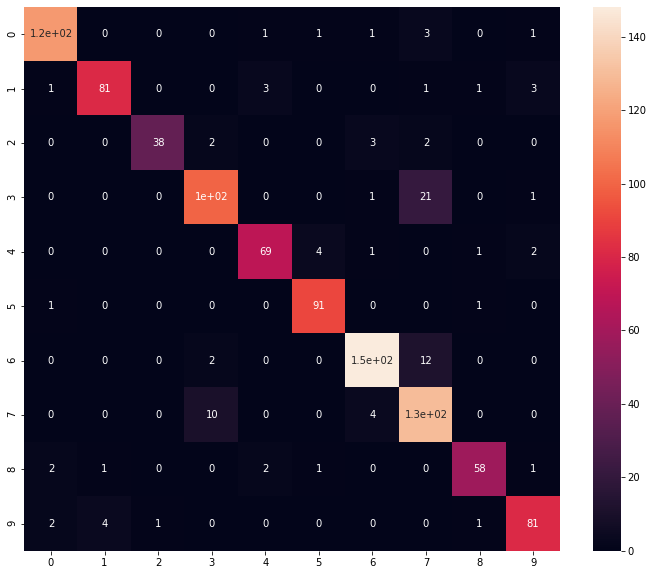

In [24]:
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.plot()

### Various Results

In [26]:
matrix = classification_report(y_test, pred)
print('ResNet50 Report : \n', matrix)

ResNet50 Report : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.94      0.90      0.92        90
           2       0.97      0.84      0.90        45
           3       0.88      0.81      0.84       123
           4       0.92      0.90      0.91        77
           5       0.94      0.98      0.96        93
           6       0.94      0.91      0.92       162
           7       0.77      0.90      0.83       144
           8       0.94      0.89      0.91        65
           9       0.91      0.91      0.91        89

    accuracy                           0.90      1012
   macro avg       0.92      0.90      0.91      1012
weighted avg       0.91      0.90      0.90      1012



------
## EfficientNetB3

<img src="https://user-images.githubusercontent.com/66634743/113626999-ec03a780-9673-11eb-9779-21d376f419d2.png" height=150 width=600>

### Loading data from pkl


In [3]:
images = utils.load_from_pkl(pkldest+"Effnetb3_images.pkl")
scenes = utils.load_from_pkl(pkldest+"scenes.pkl")

print("Shape of Images = ", images.shape)
print("Shape of Scenes = ", scenes.shape)

Shape of Images =  (5059, 300, 300, 3)
Shape of Scenes =  (5059,)


### Building the model

In [4]:
effnetB3 = EffNetB3()

effnetB3.freeze()

effnetB3_features = effnetB3.predict(images=images)

159/159 [==============================] - 40s 204ms/step


### Dumping data into .pkl files

In [5]:
if("effnetB3_features.pkl" not in os.listdir(pkldest)):
    utils.dump_into_pkl(effnetB3_features, pkldest+"effnetB3_features.pkl")

### PCA (k = 128)

In [32]:
scenes = utils.prep_labels(scenes)
k = 128

pca = PCA(n_components=k)

pca.fit(effnetB3_features)

# dump PCA model
pickle.dump(pca, open(pkldest+'effnet_pca_model.pkl', 'wb'))

PCA_features = pca.transform(effnetB3_features)

print("Shape after PCA ", PCA_features.shape)

Shape after PCA  (5059, 128)


### Classifier

In [33]:
X_train, X_test, y_train, y_test = train_test_split(PCA_features, scenes, test_size=0.2, random_state=42)

classifier = svm.SVC(kernel='rbf', probability=True)

classifier.fit(X_train, y_train)

# save model for later
pickle.dump(classifier, open(pkldest+'effnet_svm_model.pkl', 'wb'))

SVC(probability=True)

### Temporary Results

In [34]:
pred = classifier.predict(X_test)

acc = np.sum(1*(pred==y_test))/y_test.shape[0]
print("EffNetb3 + SVM  = ", acc*100)

EffNetb3 + SVM  =  90.11857707509881


### Prababilities of classes

In [35]:
effnet_probs = classifier.predict_proba(X_test)

print(effnet_probs.shape)

(1012, 10)


### Confusion Matrix

[]

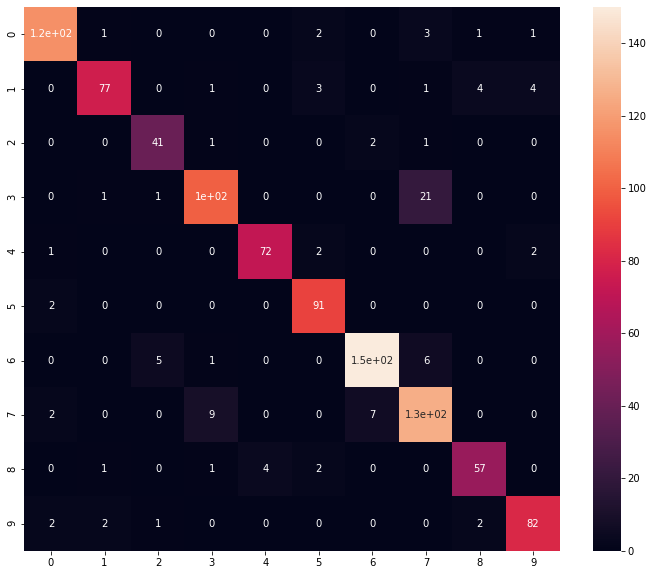

In [36]:
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.plot()

### Various Results

In [37]:
matrix = classification_report(y_test, pred)
print('EffNetB3 Report : \n', matrix)

EffNetB3 Report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.94      0.86      0.90        90
           2       0.85      0.91      0.88        45
           3       0.88      0.81      0.85       123
           4       0.95      0.94      0.94        77
           5       0.91      0.98      0.94        93
           6       0.94      0.93      0.93       162
           7       0.80      0.88      0.83       144
           8       0.89      0.88      0.88        65
           9       0.92      0.92      0.92        89

    accuracy                           0.90      1012
   macro avg       0.90      0.90      0.90      1012
weighted avg       0.90      0.90      0.90      1012



------

## Fusion

<img src="https://user-images.githubusercontent.com/66634743/113685129-f99e4900-96d6-11eb-985b-e477cdc3074b.png" height=400 width=800>

### Fusing the predictions of the 3 models

In [45]:
merged = (effnet_probs + resnet_probs + vgg16_probs)/3

merged_preds = np.argmax(merged, axis=1)

### Final Multi-Modality Model Result

In [46]:
final_acc = np.sum(y_test == merged_preds)/merged_preds.shape[0]

print("Multi-Modality Model : ", final_acc)

Multi-Modality Model :  0.9150197628458498


### Confusion Matrix

[]

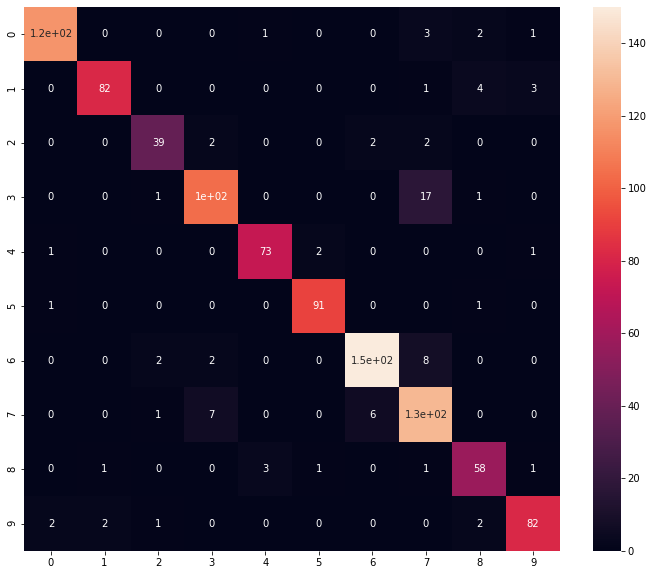

In [47]:
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, merged_preds)
sns.heatmap(cm, annot=True)
plt.plot()

### Final Scores

In [48]:
matrix = classification_report(y_test, merged_preds)
print('Final MMFM Report : \n', matrix)

Final MMFM Report : 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       124
           1       0.96      0.91      0.94        90
           2       0.89      0.87      0.88        45
           3       0.90      0.85      0.87       123
           4       0.95      0.95      0.95        77
           5       0.97      0.98      0.97        93
           6       0.95      0.93      0.94       162
           7       0.80      0.90      0.85       144
           8       0.85      0.89      0.87        65
           9       0.93      0.92      0.93        89

    accuracy                           0.92      1012
   macro avg       0.92      0.91      0.91      1012
weighted avg       0.92      0.92      0.92      1012



### Misclassification Analysis

In [110]:
x_labels = ['kitchen', 'livingroom', 'bedroom', 'airport_inside', 'casino', 
          'warehouse', 'bakery', 'bookstore', 'toystore', 'bathroom']

mclass = []
for i in range(y_test.shape[0]):
    if y_test[i] != merged_preds[i]:
        mclass.append(x_labels[y_test[i]])



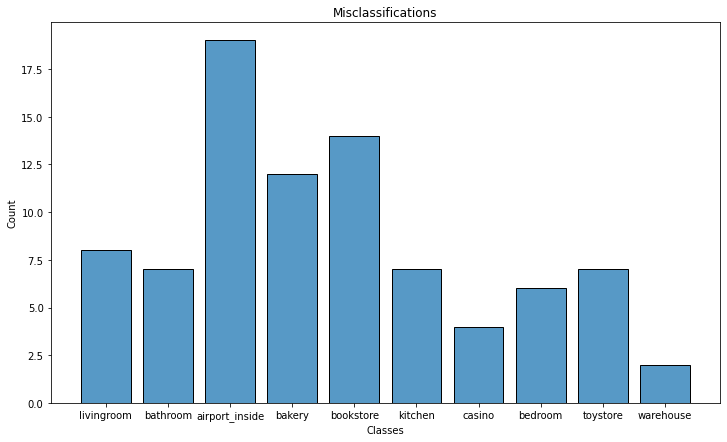

In [114]:
plt.figure(figsize=(12,7))
sns.histplot(new_mclass , bins=10, shrink=.8)
plt.title('Misclassifications')
plt.xlabel('Classes')
plt.show()